<a href="https://colab.research.google.com/github/jikrey123/data-analysis-journey/blob/main/week1_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df['Embarked'].describe

<bound method NDFrame.describe of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [4]:
#dataset shape
df.shape

(891, 12)

In [5]:
#column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PART B: checking for missing values

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Most missing value - Cabin
# Least missing value - Embarked

In [25]:
#droping one column
df = df.drop(columns=['Cabin'])

In [10]:
#filling a numerical column(age)
# Reason: age is an important column and dropping it will cause loss of many passengers
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
# filling a categorical column (embarked)
#Reason: embarked has few missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

PART C: FEATURE ENGINEERING

In [27]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'family_size']].head()

,SibSp,Parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


PART D: DESCRIPTIVE STATISTICS

In [17]:
df['Age'].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [18]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
#is age skewed ??
#does fare show signs of outliers ??

PART E: GROUPED ANALYSIS

In [28]:
#survival by gender
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
#survival by passenger class
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


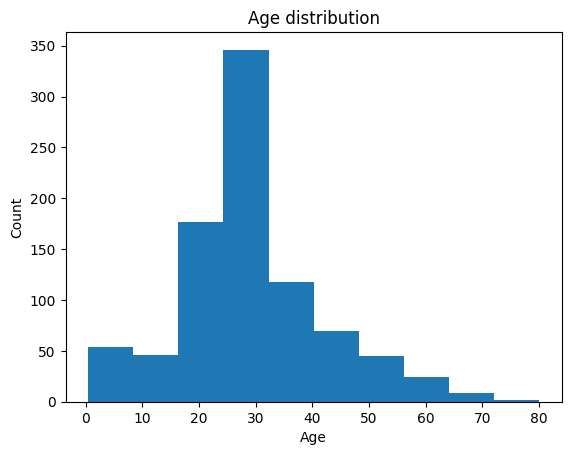

In [23]:
plt.hist(df['Age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()